In [1]:
from setting import get_engine
from setting import get_mysql_conn
import pandas as pd
import numpy as np

In [79]:
import datetime
from collections import OrderedDict
from pyecharts import options as opts
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# 找出可转债价格低于100但是我还没有买的
def find_low_not_buy(position_table):
    con1=get_engine('db_position')

    df1 = pd.read_sql(position_table,con=con1)
    con2=get_engine('db_stock')
    df2 = pd.read_sql('tb_bond_jisilu',con=con2)
    df_low = df2[df2['可转债价格']<100]
    my_code = list(df1['证券代码'].values)
    print('低于100但是我还没有买的')
    for idx,row in df_low.iterrows():
        if row['可转债代码'] not in my_code:
            
            print(row['可转债名称'],row['可转债价格'])
            

position_table='tb_position_2019-06-30'
find_low_not_buy(position_table)

明泰转债 99.94
迪森转债 99.888
亨通转债 98.76


C:\ProgramData\Anaconda3\lib\site-packages\pymysql\cursors.py:170: Warning: (1366, "Incorrect string value: '\\xD6\\xD0\\xB9\\xFA\\xB1\\xEA...' for column 'VARIABLE_VALUE' at row 480")
  result = self._query(query)


In [20]:
# 当前可转债的中位数
def calculation(table_name='tb_bond_jisilu'):
    con2=get_engine('db_stock')
    df2 = pd.read_sql(table_name,con=con2)
    m=df2['可转债价格'].median()
    m=round(m,2)
    print('可转债价格中位数：{}'.format(m))
    
    mean=df2['可转债价格'].mean()
    
    mean=round(mean,2)
    print('可转债价格平均数：{}'.format(mean))
    
    std=df2['可转债价格'].std()
    
    std=round(std,2)
    print('可转债价格方差：{}'.format(std))
    
calculation()

可转债价格中位数：105.37
可转债价格平均数：109.61
可转债价格方差：17.04


C:\ProgramData\Anaconda3\lib\site-packages\pymysql\cursors.py:170: Warning: (1366, "Incorrect string value: '\\xD6\\xD0\\xB9\\xFA\\xB1\\xEA...' for column 'VARIABLE_VALUE' at row 480")
  result = self._query(query)


In [23]:
# 测试一下那个方差
x=[1,2,3,4,5,6,7,8,9,10]
X = np.array(x)

In [24]:
X.mean()

5.5

In [25]:
X.std() # 标准差

2.8722813232690143

In [26]:
X.var() # 方差

8.25

In [46]:
def my_fangca(X):
    l=len(X)
    mean=X.mean()
    sum_ = 0
    sum_std=0
    for i in X:
        sum_+=(i-mean)**2
    var_=sum_/l
    std_=(sum_/(l))**0.5
    return var_,std_

In [47]:
result = my_fangca(X)

In [48]:
result

(8.25, 2.8722813232690143)

In [12]:
# tb_jsl_2019-06-26
d='2019-06-26'
con = get_engine('db_jisilu',local='local')
df = pd.read_sql('tb_jsl_{}'.format(d),con=con)
df=df[df['可转债价格']>0] # 去除停牌

ret = df['可转债价格'].std()

# def get_daily_std(df=None):
#     print()
    
# get_daily_std(df)

/home/xda/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:170: Warning: (1366, "Incorrect string value: '\\xD6\\xD0\\xB9\\xFA\\xB1\\xEA...' for column 'VARIABLE_VALUE' at row 480")
  result = self._query(query)


In [14]:
ret

16.649431205484024

In [13]:
df

Error: 无法为内核 Python 3 启动会话。请选择另一个内核来启动。

In [74]:
import math

In [72]:
# 02-25 start
start = datetime.datetime(2019,2,25)
current = start
result=OrderedDict()
while current<datetime.datetime.now():
    d=current.strftime('%Y-%m-%d')
#     print(d)
#     d=d.replace('2019-','')
    current=current+datetime.timedelta(days=1)
    try:
        df = pd.read_sql('tb_jsl_{}'.format(d),con=con)
    except Exception as e:
        print(e)
        continue
    else:
        df=df[df['可转债价格']>0] # 去除停牌
        ret = round(df['可转债价格'].std(),1)
        d=d=d.replace('2019-','')
        
        result[d]=ret
    

(pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'tb_jsl_2019-03-02' at line 1")
[SQL: tb_jsl_2019-03-02]
(Background on this error at: http://sqlalche.me/e/f405)
(pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'tb_jsl_2019-03-03' at line 1")
[SQL: tb_jsl_2019-03-03]
(Background on this error at: http://sqlalche.me/e/f405)
(pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'tb_jsl_2019-03-09' at line 1")
[SQL: tb_jsl_2019-03-09]
(Background on this error at: http://sqlalche.me/e/f405)
(pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version

(pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'tb_jsl_2019-05-14' at line 1")
[SQL: tb_jsl_2019-05-14]
(Background on this error at: http://sqlalche.me/e/f405)
(pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'tb_jsl_2019-05-18' at line 1")
[SQL: tb_jsl_2019-05-18]
(Background on this error at: http://sqlalche.me/e/f405)
(pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'tb_jsl_2019-05-19' at line 1")
[SQL: tb_jsl_2019-05-19]
(Background on this error at: http://sqlalche.me/e/f405)
(pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version

In [71]:
result

OrderedDict()

In [68]:
from pyecharts.charts import Line,Bar

In [24]:
line = (Line().add_xaxis(list(result.keys())).add_yaxis('波动率',list(result.values())))

In [25]:
line.render()

In [87]:
bar = (Bar()
       .add_xaxis(list(result.keys()))
       .add_yaxis('波动率',list(result.values()),category_gap='50%',color='green',label_opts=opts.LabelOpts(is_show=False))
       .set_global_opts(
            title_opts=opts.TitleOpts(title="Bar-基本示例", subtitle="我是副标题"),
            toolbox_opts=opts.ToolboxOpts(),
            legend_opts=opts.LegendOpts(is_show=False),
           zhua
           visualmap_opts=opts.VisualMapOpts(
                type_="color", max_=20, min_=15
            ),
       )
       
      )
bar.render_notebook()

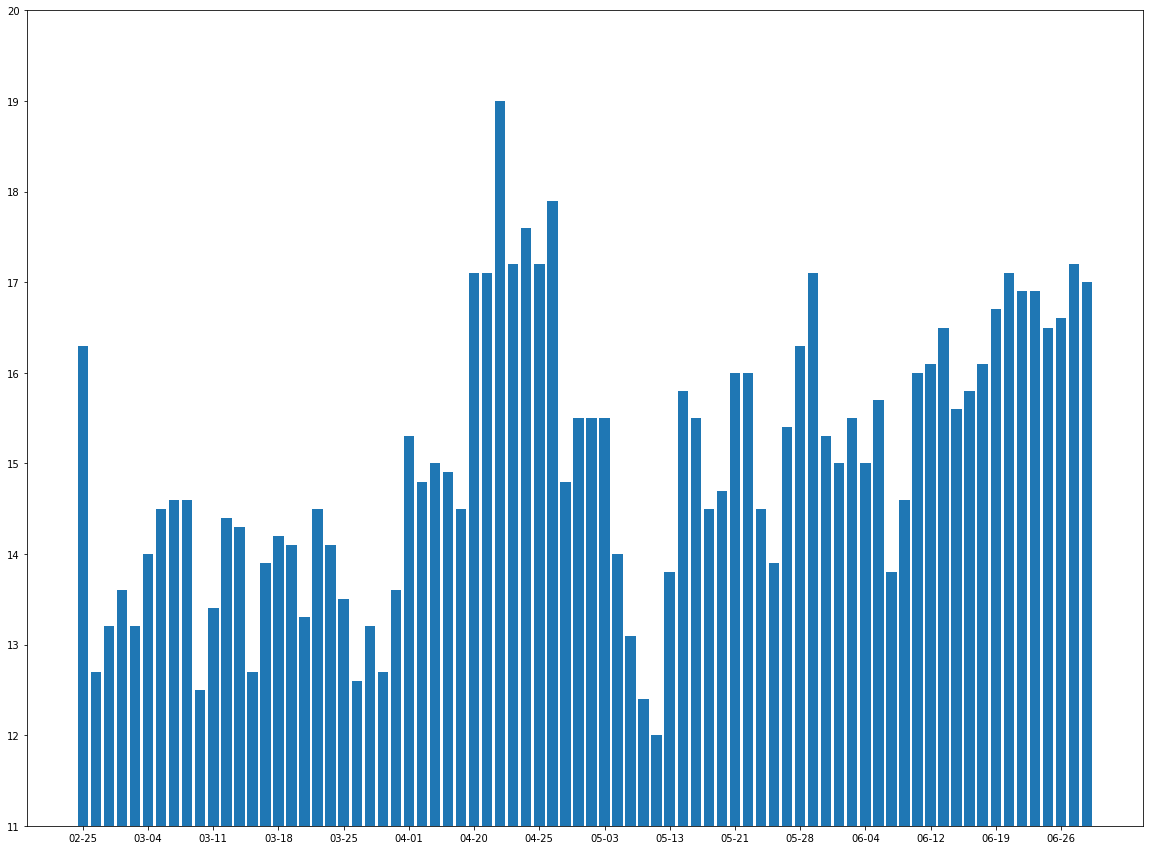

In [94]:
plt.figure(figsize=(20,15))
x=list(result.keys())
y=list(result.values())
plt.bar(x,y)
plt.ylim([min(y)-1,max(y)+1])
plt.xticks(x[::5])
plt.show()

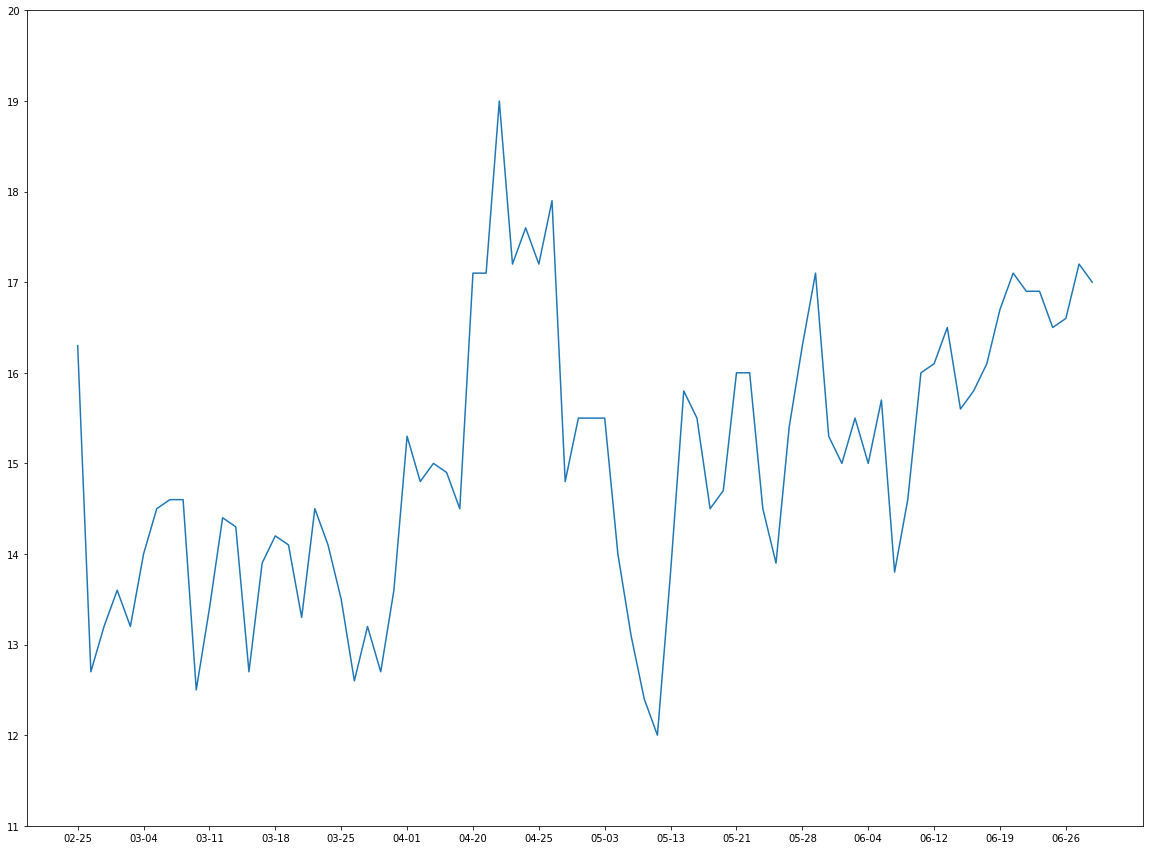

In [95]:
plt.figure(figsize=(20,15))
x=list(result.keys())
y=list(result.values())
plt.plot(x,y)
plt.ylim([min(y)-1,max(y)+1])
plt.xticks(x[::5])
plt.show()

In [98]:
line = (Line().add_xaxis(list(result.keys()))
        .add_yaxis('波动率',list(result.values()))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="可转债标准差"),
            toolbox_opts=opts.ToolboxOpts(),
            legend_opts=opts.LegendOpts(is_show=False),
           visualmap_opts=opts.VisualMapOpts(
                type_="color", max_=20, min_=15
            ))
      )
line.render_notebook()